In [1]:
import numpy as np
from scipy.spatial import Delaunay#, ConvexHull
import matplotlib.pyplot as plt
from copy import copy, deepcopy

## Define a hull
Define the shape on the negative side of Y axis

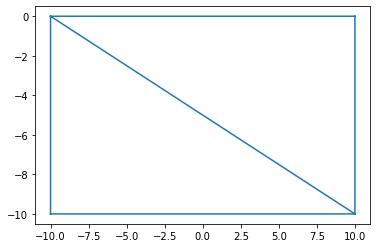

In [2]:
hull_bound_points = np.array([[10,-10],[-10,-10],[10,0],[-10,0]])
hull_bound = Delaunay(hull_bound_points)
plt.triplot(hull_bound_points[:,0], hull_bound_points[:,1], hull_bound.simplices)
plt.show()

## Define points inside hull

The denser the point, the finer the meshing

In [3]:
mesh_points = []
for i in range(-10,10+1,10):
    for j in range(-10,1,5):
        mesh_points.append([i,j])
mesh_ini = np.array(mesh_points)

Check if point is inside

In [4]:
mesh = np.array([p_ for p_ in mesh_ini if hull_bound.find_simplex(p_)>=0])

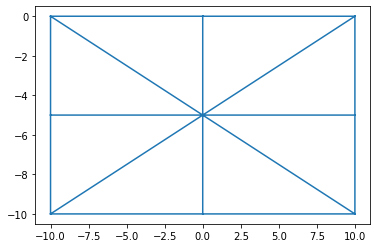

In [5]:
tri = Delaunay(mesh)
plt.triplot(mesh[:,0], mesh[:,1], tri.simplices)
plt.show()

Number of points

In [6]:
tri.points.shape[0]

9

Number of triangles

In [7]:
tri.simplices.shape[0]

8

Common edge

In [8]:
edgecommon = np.array([[10,0],[-10,0]])

In [9]:
edgecommon[0][0]

10

In [10]:
def overlappedPoints(points, edgecommon):
    oPoints = []
    for i in points:
        if (edgecommon[0][0] == edgecommon[1][0]):
            if ((i[0] == edgecommon[0][0]) and ((i[1] - edgecommon[0][1])*(i[1] - edgecommon[1][1])<=0)):
                oPoints.append([i[0],i[1]])
        elif (edgecommon[0][1] == edgecommon[1][1]):
            if((i[1] == edgecommon[0][1]) and ((i[0] - edgecommon[0][0])*(i[0] - edgecommon[1][0])<=0)):
                oPoints.append([i[0],i[1]])
        elif(((i[0] - edgecommon[0][0])/(edgecommon[1][0]-edgecommon[0][0]) - (i[1] - edgecommon[0][1])/(edgecommon[1][1]-edgecommon[0][1])<10e-3) and ((i[1] - edgecommon[0][1])*(i[1] - edgecommon[1][1])<=0)):
            oPoints.append([i[0],i[1]])
    return np.array(oPoints)     

In [11]:
p = overlappedPoints(tri.points, edgecommon)
p

array([[-10.,   0.],
       [  0.,   0.],
       [ 10.,   0.]])

In [12]:
tri.points

array([[-10., -10.],
       [-10.,  -5.],
       [-10.,   0.],
       [  0., -10.],
       [  0.,  -5.],
       [  0.,   0.],
       [ 10., -10.],
       [ 10.,  -5.],
       [ 10.,   0.]])

In [13]:
def overlappedPointsPosition(points,points_list):
    olPP = []
    for i in points_list:
        x = (points == i).all(axis=1).nonzero()
        olPP.append(x[0][0])
    return olPP

In [14]:
olPP = overlappedPointsPosition(tri.points,p)
olPP

[2, 5, 8]

In [15]:
tri.simplices

array([[1, 4, 2],
       [4, 5, 2],
       [3, 4, 0],
       [4, 1, 0],
       [4, 8, 5],
       [4, 7, 8],
       [4, 3, 6],
       [7, 4, 6]], dtype=int32)

## Add Hull

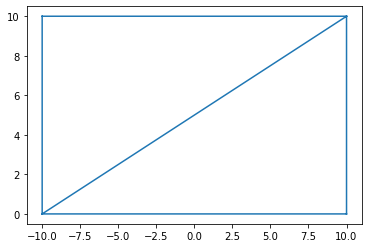

In [16]:
hull_bound_points_add = np.array([[10,10],[-10,10],[10,0],[-10,0]])
hull_bound_add = Delaunay(hull_bound_points_add)
plt.triplot(hull_bound_points_add[:,0], hull_bound_points_add[:,1], hull_bound_add.simplices)
plt.show()

In [17]:
min(i[0] for i in hull_bound_points_add)

-10

In [18]:
mesh_points_add = []
mesh_res_add = 2
for i in range(min(i[0] for i in hull_bound_points_add),max(i[0] for i in hull_bound_points_add)+1,mesh_res_add):
    for j in range(min(i[1] for i in hull_bound_points_add),max(i[1] for i in hull_bound_points_add)+1,mesh_res_add):
        mesh_points_add.append([i,j])
mesh_ini_add = np.array(mesh_points_add)

In [19]:
mesh_ini_add

array([[-10,   0],
       [-10,   2],
       [-10,   4],
       [-10,   6],
       [-10,   8],
       [-10,  10],
       [ -8,   0],
       [ -8,   2],
       [ -8,   4],
       [ -8,   6],
       [ -8,   8],
       [ -8,  10],
       [ -6,   0],
       [ -6,   2],
       [ -6,   4],
       [ -6,   6],
       [ -6,   8],
       [ -6,  10],
       [ -4,   0],
       [ -4,   2],
       [ -4,   4],
       [ -4,   6],
       [ -4,   8],
       [ -4,  10],
       [ -2,   0],
       [ -2,   2],
       [ -2,   4],
       [ -2,   6],
       [ -2,   8],
       [ -2,  10],
       [  0,   0],
       [  0,   2],
       [  0,   4],
       [  0,   6],
       [  0,   8],
       [  0,  10],
       [  2,   0],
       [  2,   2],
       [  2,   4],
       [  2,   6],
       [  2,   8],
       [  2,  10],
       [  4,   0],
       [  4,   2],
       [  4,   4],
       [  4,   6],
       [  4,   8],
       [  4,  10],
       [  6,   0],
       [  6,   2],
       [  6,   4],
       [  6,   6],
       [  6,

In [20]:
p2 = overlappedPoints(mesh_ini_add, edgecommon)
p2

array([[-10,   0],
       [ -8,   0],
       [ -6,   0],
       [ -4,   0],
       [ -2,   0],
       [  0,   0],
       [  2,   0],
       [  4,   0],
       [  6,   0],
       [  8,   0],
       [ 10,   0]])

In [21]:
olPP2 = overlappedPointsPosition(mesh_ini_add,p2)
olPP2

[0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60]

In [22]:
mesh_ini_add_del = np.delete(mesh_ini_add, olPP2, 0)
mesh_ini_add_del

array([[-10,   2],
       [-10,   4],
       [-10,   6],
       [-10,   8],
       [-10,  10],
       [ -8,   2],
       [ -8,   4],
       [ -8,   6],
       [ -8,   8],
       [ -8,  10],
       [ -6,   2],
       [ -6,   4],
       [ -6,   6],
       [ -6,   8],
       [ -6,  10],
       [ -4,   2],
       [ -4,   4],
       [ -4,   6],
       [ -4,   8],
       [ -4,  10],
       [ -2,   2],
       [ -2,   4],
       [ -2,   6],
       [ -2,   8],
       [ -2,  10],
       [  0,   2],
       [  0,   4],
       [  0,   6],
       [  0,   8],
       [  0,  10],
       [  2,   2],
       [  2,   4],
       [  2,   6],
       [  2,   8],
       [  2,  10],
       [  4,   2],
       [  4,   4],
       [  4,   6],
       [  4,   8],
       [  4,  10],
       [  6,   2],
       [  6,   4],
       [  6,   6],
       [  6,   8],
       [  6,  10],
       [  8,   2],
       [  8,   4],
       [  8,   6],
       [  8,   8],
       [  8,  10],
       [ 10,   2],
       [ 10,   4],
       [ 10,

In [23]:
mesh_ini_add_del_add = np.append(p,mesh_ini_add_del, axis=0)
mesh_ini_add_del_add

array([[-10.,   0.],
       [  0.,   0.],
       [ 10.,   0.],
       [-10.,   2.],
       [-10.,   4.],
       [-10.,   6.],
       [-10.,   8.],
       [-10.,  10.],
       [ -8.,   2.],
       [ -8.,   4.],
       [ -8.,   6.],
       [ -8.,   8.],
       [ -8.,  10.],
       [ -6.,   2.],
       [ -6.,   4.],
       [ -6.,   6.],
       [ -6.,   8.],
       [ -6.,  10.],
       [ -4.,   2.],
       [ -4.,   4.],
       [ -4.,   6.],
       [ -4.,   8.],
       [ -4.,  10.],
       [ -2.,   2.],
       [ -2.,   4.],
       [ -2.,   6.],
       [ -2.,   8.],
       [ -2.,  10.],
       [  0.,   2.],
       [  0.,   4.],
       [  0.,   6.],
       [  0.,   8.],
       [  0.,  10.],
       [  2.,   2.],
       [  2.,   4.],
       [  2.,   6.],
       [  2.,   8.],
       [  2.,  10.],
       [  4.,   2.],
       [  4.,   4.],
       [  4.,   6.],
       [  4.,   8.],
       [  4.,  10.],
       [  6.,   2.],
       [  6.,   4.],
       [  6.,   6.],
       [  6.,   8.],
       [  6.,

In [24]:
mesh_add = np.array([p_ for p_ in mesh_ini_add_del_add if hull_bound_add.find_simplex(p_)>=0])

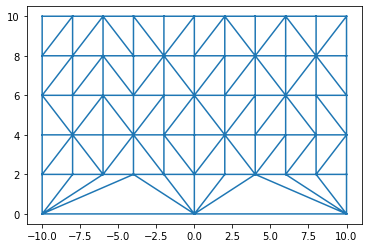

In [25]:
tri_add = Delaunay(mesh_add)
plt.triplot(mesh_add[:,0], mesh_add[:,1], tri_add.simplices)
plt.show()

In [26]:
tri_final_points = np.concatenate((tri.points, mesh_ini_add_del), axis=0)
tri_final_points

array([[-10., -10.],
       [-10.,  -5.],
       [-10.,   0.],
       [  0., -10.],
       [  0.,  -5.],
       [  0.,   0.],
       [ 10., -10.],
       [ 10.,  -5.],
       [ 10.,   0.],
       [-10.,   2.],
       [-10.,   4.],
       [-10.,   6.],
       [-10.,   8.],
       [-10.,  10.],
       [ -8.,   2.],
       [ -8.,   4.],
       [ -8.,   6.],
       [ -8.,   8.],
       [ -8.,  10.],
       [ -6.,   2.],
       [ -6.,   4.],
       [ -6.,   6.],
       [ -6.,   8.],
       [ -6.,  10.],
       [ -4.,   2.],
       [ -4.,   4.],
       [ -4.,   6.],
       [ -4.,   8.],
       [ -4.,  10.],
       [ -2.,   2.],
       [ -2.,   4.],
       [ -2.,   6.],
       [ -2.,   8.],
       [ -2.,  10.],
       [  0.,   2.],
       [  0.,   4.],
       [  0.,   6.],
       [  0.,   8.],
       [  0.,  10.],
       [  2.,   2.],
       [  2.,   4.],
       [  2.,   6.],
       [  2.,   8.],
       [  2.,  10.],
       [  4.,   2.],
       [  4.,   4.],
       [  4.,   6.],
       [  4.,

In [27]:
tri_add_simplices_mod = tri_add.simplices + tri.points.shape[0] - len(olPP)
tri_add_simplices_mod

array([[19, 14,  6],
       [29, 24,  7],
       [14,  9,  6],
       [59, 54,  8],
       [54, 49,  8],
       [34, 29,  7],
       [44, 39,  7],
       [39, 34,  7],
       [49, 44,  8],
       [44,  7,  8],
       [44, 49, 50],
       [45, 44, 50],
       [24, 19,  6],
       [ 7, 24,  6],
       [ 9, 15, 10],
       [15,  9, 14],
       [15, 19, 20],
       [15, 14, 19],
       [51, 45, 50],
       [51, 46, 45],
       [15, 11, 10],
       [11, 15, 16],
       [21, 15, 20],
       [15, 21, 16],
       [55, 51, 50],
       [51, 55, 56],
       [49, 55, 50],
       [54, 55, 49],
       [43, 38, 37],
       [42, 43, 37],
       [51, 47, 46],
       [47, 51, 52],
       [47, 53, 48],
       [53, 47, 52],
       [47, 41, 46],
       [41, 47, 42],
       [47, 43, 42],
       [43, 47, 48],
       [53, 57, 58],
       [57, 53, 52],
       [51, 57, 52],
       [57, 51, 56],
       [58, 57, 63],
       [57, 62, 63],
       [62, 57, 61],
       [57, 56, 61],
       [17, 11, 16],
       [11, 1

In [28]:
tri_add.simplices

array([[13,  8,  0],
       [23, 18,  1],
       [ 8,  3,  0],
       [53, 48,  2],
       [48, 43,  2],
       [28, 23,  1],
       [38, 33,  1],
       [33, 28,  1],
       [43, 38,  2],
       [38,  1,  2],
       [38, 43, 44],
       [39, 38, 44],
       [18, 13,  0],
       [ 1, 18,  0],
       [ 3,  9,  4],
       [ 9,  3,  8],
       [ 9, 13, 14],
       [ 9,  8, 13],
       [45, 39, 44],
       [45, 40, 39],
       [ 9,  5,  4],
       [ 5,  9, 10],
       [15,  9, 14],
       [ 9, 15, 10],
       [49, 45, 44],
       [45, 49, 50],
       [43, 49, 44],
       [48, 49, 43],
       [37, 32, 31],
       [36, 37, 31],
       [45, 41, 40],
       [41, 45, 46],
       [41, 47, 42],
       [47, 41, 46],
       [41, 35, 40],
       [35, 41, 36],
       [41, 37, 36],
       [37, 41, 42],
       [47, 51, 52],
       [51, 47, 46],
       [45, 51, 46],
       [51, 45, 50],
       [52, 51, 57],
       [51, 56, 57],
       [56, 51, 55],
       [51, 50, 55],
       [11,  5, 10],
       [ 5, 1

In [29]:
for i in range(len(olPP)):
    pos = np.where(tri_add_simplices_mod == (i + tri.points.shape[0] - len(olPP)))
    print(pos)
    for j in range(len(pos[0])):
        tri_add_simplices_mod[pos[0][j]][pos[1][j]] = olPP[i]
tri_add_simplices_mod

(array([ 0,  2, 12, 13], dtype=int64), array([2, 2, 2, 2], dtype=int64))
(array([ 1,  5,  6,  7,  9, 13], dtype=int64), array([2, 2, 2, 2, 1, 0], dtype=int64))
(array([3, 4, 8, 9], dtype=int64), array([2, 2, 2, 2], dtype=int64))


array([[19, 14,  2],
       [29, 24,  5],
       [14,  9,  2],
       [59, 54,  8],
       [54, 49,  8],
       [34, 29,  5],
       [44, 39,  5],
       [39, 34,  5],
       [49, 44,  8],
       [44,  5,  8],
       [44, 49, 50],
       [45, 44, 50],
       [24, 19,  2],
       [ 5, 24,  2],
       [ 9, 15, 10],
       [15,  9, 14],
       [15, 19, 20],
       [15, 14, 19],
       [51, 45, 50],
       [51, 46, 45],
       [15, 11, 10],
       [11, 15, 16],
       [21, 15, 20],
       [15, 21, 16],
       [55, 51, 50],
       [51, 55, 56],
       [49, 55, 50],
       [54, 55, 49],
       [43, 38, 37],
       [42, 43, 37],
       [51, 47, 46],
       [47, 51, 52],
       [47, 53, 48],
       [53, 47, 52],
       [47, 41, 46],
       [41, 47, 42],
       [47, 43, 42],
       [43, 47, 48],
       [53, 57, 58],
       [57, 53, 52],
       [51, 57, 52],
       [57, 51, 56],
       [58, 57, 63],
       [57, 62, 63],
       [62, 57, 61],
       [57, 56, 61],
       [17, 11, 16],
       [11, 1

In [30]:
tri_final_simplices = np.concatenate((tri.simplices, tri_add_simplices_mod), axis=0)
tri_final_simplices 

array([[ 1,  4,  2],
       [ 4,  5,  2],
       [ 3,  4,  0],
       [ 4,  1,  0],
       [ 4,  8,  5],
       [ 4,  7,  8],
       [ 4,  3,  6],
       [ 7,  4,  6],
       [19, 14,  2],
       [29, 24,  5],
       [14,  9,  2],
       [59, 54,  8],
       [54, 49,  8],
       [34, 29,  5],
       [44, 39,  5],
       [39, 34,  5],
       [49, 44,  8],
       [44,  5,  8],
       [44, 49, 50],
       [45, 44, 50],
       [24, 19,  2],
       [ 5, 24,  2],
       [ 9, 15, 10],
       [15,  9, 14],
       [15, 19, 20],
       [15, 14, 19],
       [51, 45, 50],
       [51, 46, 45],
       [15, 11, 10],
       [11, 15, 16],
       [21, 15, 20],
       [15, 21, 16],
       [55, 51, 50],
       [51, 55, 56],
       [49, 55, 50],
       [54, 55, 49],
       [43, 38, 37],
       [42, 43, 37],
       [51, 47, 46],
       [47, 51, 52],
       [47, 53, 48],
       [53, 47, 52],
       [47, 41, 46],
       [41, 47, 42],
       [47, 43, 42],
       [43, 47, 48],
       [53, 57, 58],
       [57, 5

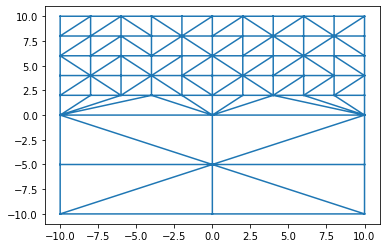

In [35]:
plt.triplot(tri_final_points[:,0], tri_final_points[:,1], tri_final_simplices)
plt.show()

In [32]:
len(tri_final_points[:,0])

64